<a href="https://colab.research.google.com/github/RmmR504/Portfolio/blob/Projects/Portfolio%20-%20Unsupervised%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application of clustering, Silhouette coefficiente and Kmeans algorithm

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("Train (1).csv")
df

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [ ]:
df.nunique()

Employee_ID                  7000
Gender                          2
Age                            47
Education_Level                 5
Relationship_Status             2
Hometown                        5
Unit                           12
Decision_skill_possess          4
Time_of_service                44
Time_since_promotion            5
growth_rate                    55
Travel_Rate                     3
Post_Level                      5
Pay_Scale                      10
Compensation_and_Benefits       5
Work_Life_balance               5
VAR1                            5
VAR2                            5
VAR3                            5
VAR4                            3
VAR5                            5
VAR6                            5
VAR7                            5
Attrition_rate               3317
dtype: int64

In [ ]:
df2 = df.copy()
df2

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


En las siguientes líneas de código, se detectan los valores faltantes y se elige el método para imputar dichos valores.

In [ ]:
pd.isna(df2).sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [ ]:
df2["Age"].fillna(df2["Age"].median(), inplace=True)
df2["Time_of_service"].fillna(df2["Time_of_service"].median(), inplace=True)
df2["Work_Life_balance"].fillna(round(df2["Work_Life_balance"].mean()), inplace=True)
df2["Pay_Scale"].fillna(round(df2["Pay_Scale"].mean()), inplace=True)
df2["VAR2"].fillna(round(df2["VAR2"].mean()), inplace=True)
df2["VAR4"].fillna(round(df2["VAR4"].mean()), inplace=True)

In [ ]:
pd.isna(df2).sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dado que hay solamente 5 features que son categóricas y que todas ellas son de pocos valores únicos, decidí no eliminar ninguna y tratarlas todas con ordinal encoding. La única que voy a eliminar por ahora es el Employee_ID.

In [ ]:
df2.drop('Employee_ID', axis=1, inplace=True)

In [ ]:
# Transformamos todas las variables que encuentre de tipo object (categóricas) utilizando el ordinal encoder
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = OrdinalEncoder().fit_transform(df2[[col]])
X_train = df2.to_numpy()
print(X_train)


[[ 0.     42.      4.     ...  5.      3.      0.1841]
 [ 1.     24.      3.     ...  5.      3.      0.067 ]
 [ 0.     58.      3.     ...  8.      3.      0.0851]
 ...
 [ 0.     49.      3.     ...  8.      3.      0.7847]
 [ 0.     47.      3.     ...  6.      3.      0.4162]
 [ 0.     58.      3.     ...  5.      3.      0.091 ]]


In [ ]:
v = 0
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
for i in range(5):
  for j in range(5):
    axs[i,j].scatter(X_train[:,v], X_train[:,1])
    axs[i,j].set_title(df2.columns[v])
    axs[i,j].set_ylim([0,0.5e7])
    v+=1
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

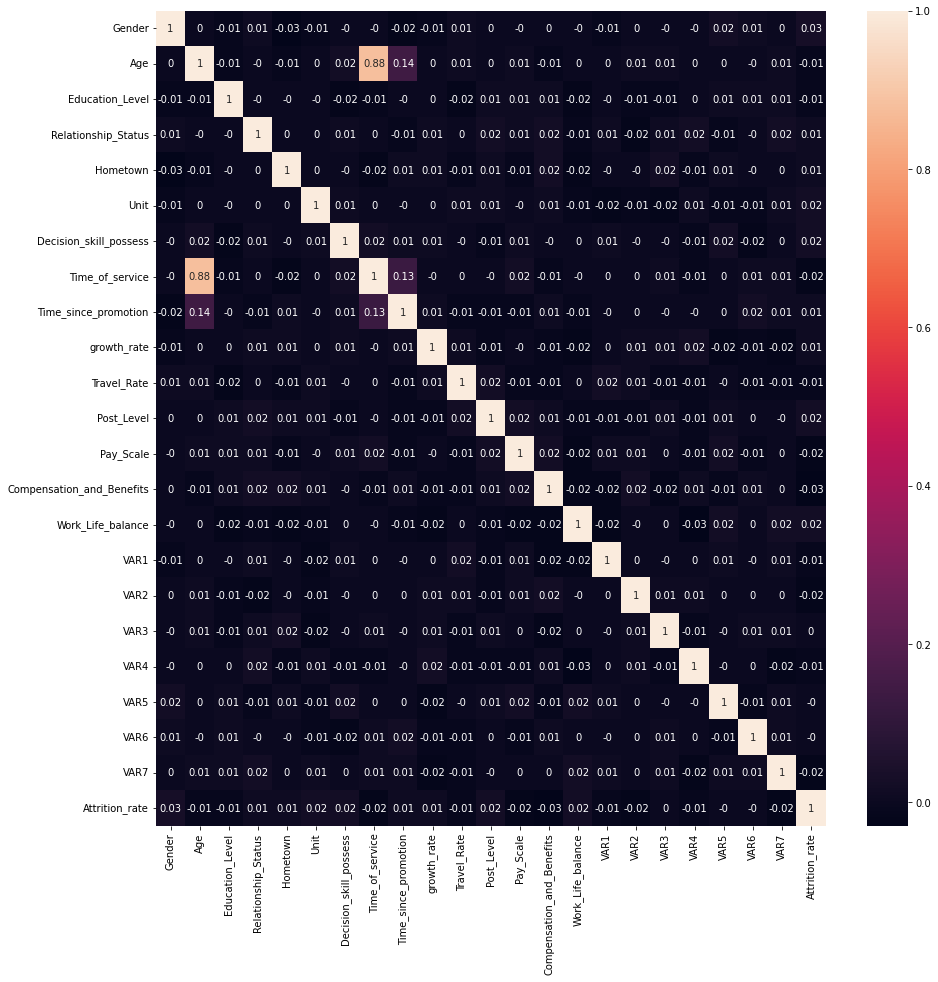

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(round(df2.corr(),2),annot=True)

In [ ]:
X = StandardScaler().fit_transform(X_train)
X

array([[-0.83756018,  0.19158484,  0.76255659, ..., -1.80495079,
        -0.27776175, -0.02840599],
       [ 1.19394406, -1.17062324, -0.17638732, ..., -1.80495079,
        -0.27776175, -0.65885713],
       [-0.83756018,  1.40243646, -0.17638732, ...,  0.77197263,
        -0.27776175, -0.56140908],
       ...,
       [-0.83756018,  0.72133242, -0.17638732, ...,  0.77197263,
        -0.27776175,  3.20514613],
       [-0.83756018,  0.56997597, -0.17638732, ..., -0.94597631,
        -0.27776175,  1.22119016],
       [-0.83756018,  1.40243646, -0.17638732, ..., -1.80495079,
        -0.27776175, -0.52964425]])

In [ ]:
nc = 11

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn import cluster, metrics

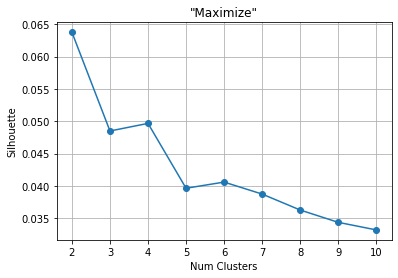

In [ ]:
results = {}
for k in range(2, nc):
  k_means = cluster.KMeans(n_clusters=k).fit(X)
  y_pred = k_means.predict(X)
  results[k] = metrics.silhouette_score(X, y_pred)

clusters_counts = list(results.keys())
index_values = list(results.values())

plt.plot(clusters_counts, index_values, 'o-')
plt.grid(True)
plt.title('"Maximize"')
plt.xlabel('Num Clusters')
plt.xticks(clusters_counts)
plt.ylabel('Silhouette')
plt.show()

In [ ]:
k = 4

k_means = cluster.KMeans(n_clusters=k)
y_pred = k_means.fit_predict(X)
y_pred

array([2, 1, 3, ..., 0, 3, 3], dtype=int32)

In [ ]:
df["group"] = y_pred
df

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,group
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,2
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,1
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,3
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668,1
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839,0
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055,2
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847,0
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162,3


In [ ]:
empleados = []
for g in range(k):
  empleados.append(df[df['group']==g])

In [ ]:
for g in range(k):
  print('Group '+str(g),'tiene', len(empleados[g]), 'empleados')

Group 0 tiene 586 empleados
Group 1 tiene 1670 empleados
Group 2 tiene 2697 empleados
Group 3 tiene 2047 empleados


In [ ]:
grouped = pd.DataFrame()
grouped['Variables'] = df.columns[:-1]
for g in range(k):
    arr = []
    for col in grouped['Variables']:
        if empleados[g][col].dtype != 'object':
            arr.append(np.round(empleados[g][col].mean(),2))
        else:
            arr.append(empleados[g][col].value_counts().keys()[0])
    grouped['Group'+str(g)] = arr
grouped

,Variables,Group0,Group1,Group2,Group3
0,Employee_ID,EID_2278,EID_18000,EID_23371,EID_3891
1,Gender,F,F,F,F
2,Age,38.1,32.93,31.22,55.88
3,Education_Level,3.16,3.19,3.21,3.17
4,Relationship_Status,Married,Single,Married,Married
5,Hometown,Lebanon,Lebanon,Lebanon,Lebanon
6,Unit,IT,IT,IT,IT
7,Decision_skill_possess,Directive,Analytical,Analytical,Directive
8,Time_of_service,11.9,8.1,7.0,26.33
9,Time_since_promotion,2.42,2.28,2.28,2.54


Según los últimos resultados, el grupo 0 tiene un índice de decersión promedio considerablemete más elevado que los demás. A la luz de los demás resultados, no es muy fácil determinar por qué motivo existe esta diferencia pero pareciera tener algo que ver con una combinación de factores como la escala de pagos, nivel de educación (su promedio en ambas variables es el menor de los 4 grupos), la edad y el Travel rate.  